In [2]:
!pip install yfinance
!pip install mplfinance
import mplfinance as mpf
import yfinance as yf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


In [3]:
!pip install jugaad-data
from datetime import date
from jugaad_data.nse import stock_csv, stock_df



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.8/115.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.1.7
    Uninstalling click-8.1.7:
      Successfully uninstalled click-8.1.7
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.11.2
    Uninstalling beautifulsoup4-4.11.2:
      Successfully uninstalled beautifulsoup4-4.11.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
flask 2.2.5 requires click>=8.0, but you have click 7.1.2 which is incompatible.
dask 2023.8.1 requires

In [4]:
# Download as pandas dataframe
df = stock_df(symbol="MRF", from_date=date(2000,1,1),
            to_date=date(2022,10,30), series="EQ")

In [5]:
df.set_index("DATE")
df['DATE'] = pd.to_datetime(df['DATE'])

In [6]:
df.columns

Index(['DATE', 'SERIES', 'OPEN', 'HIGH', 'LOW', 'PREV. CLOSE', 'LTP', 'CLOSE',
       'VWAP', '52W H', '52W L', 'VOLUME', 'VALUE', 'NO OF TRADES', 'SYMBOL'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5687 entries, 0 to 5686
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          5687 non-null   datetime64[ns]
 1   SERIES        5687 non-null   object        
 2   OPEN          5687 non-null   float64       
 3   HIGH          5687 non-null   float64       
 4   LOW           5687 non-null   float64       
 5   PREV. CLOSE   5687 non-null   float64       
 6   LTP           5687 non-null   float64       
 7   CLOSE         5687 non-null   float64       
 8   VWAP          5687 non-null   float64       
 9   52W H         5671 non-null   float64       
 10  52W L         5671 non-null   float64       
 11  VOLUME        5687 non-null   int64         
 12  VALUE         5687 non-null   float64       
 13  NO OF TRADES  5687 non-null   int64         
 14  SYMBOL        5687 non-null   object        
dtypes: datetime64[ns](1), float64(10), int

In [8]:
len(df)

5687

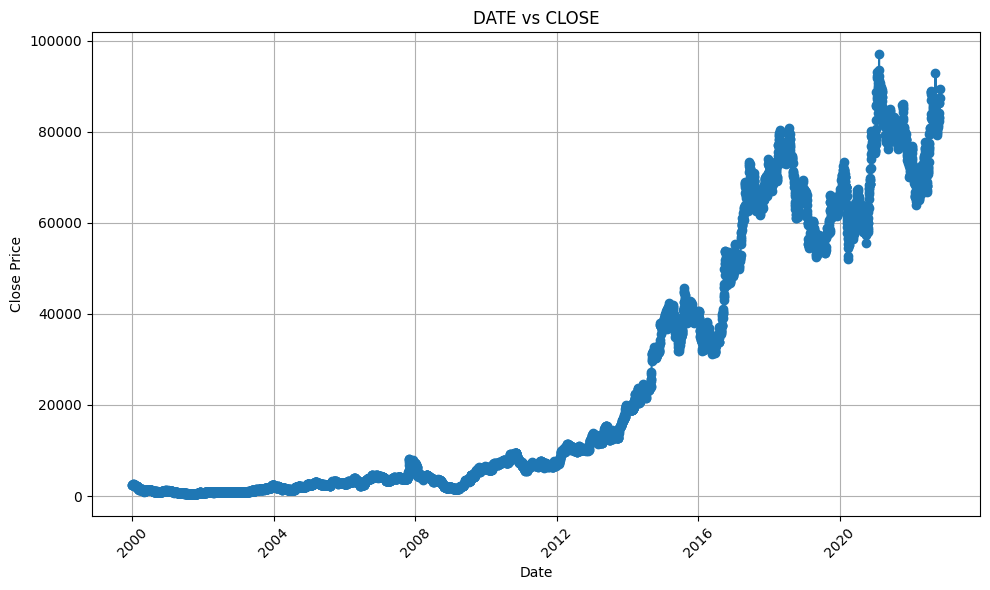

In [9]:
df = df.sort_values(by='DATE')
plt.figure(figsize=(10, 6))

plt.plot(df["DATE"], df['CLOSE'], marker='o', linestyle='-')
plt.title('DATE vs CLOSE')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()


In [10]:
split_size=int(0.8*len(df))
print(split_size)

4549


In [11]:
new_df = df[['DATE', 'CLOSE']].copy()
new_df.set_index('DATE', inplace=True)
new_df.index = pd.to_datetime(new_df.index)


In [12]:
new_df.head()

,CLOSE
DATE,
2000-01-03,2354.80
2000-01-04,2426.10
2000-01-05,2350.00
2000-01-06,2536.85
2000-01-07,2470.80


In [13]:
timesteps=new_df.index.to_numpy()
prices=new_df["CLOSE"].to_numpy()


In [15]:
X_train,y_train=timesteps[:split_size],prices[:split_size]
X_test,y_test=timesteps[split_size:],prices[split_size:]

In [16]:
len(X_train),len(y_train),len(X_test),len(y_test)

(4549, 4549, 1138, 1138)

In [17]:
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("Price")
    plt.grid(True)


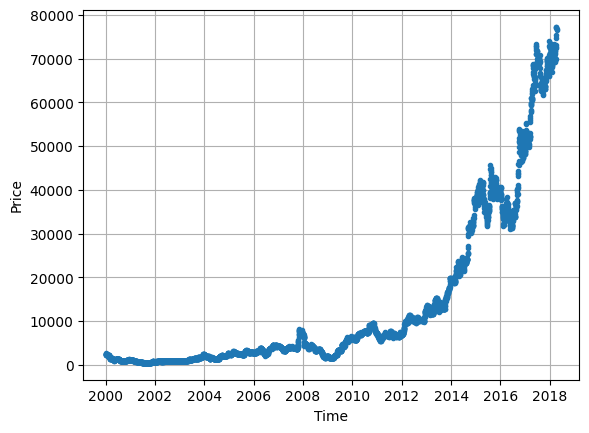

In [18]:
plot_time_series(timesteps=X_train,values=y_train,label="Train_data")

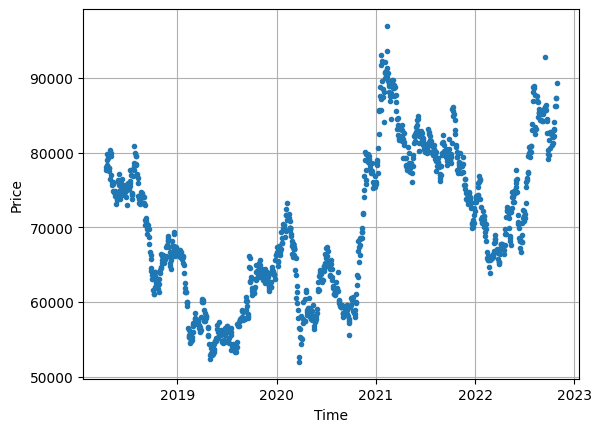

In [19]:
plot_time_series(timesteps=X_test,values=y_test,label="Test_data")

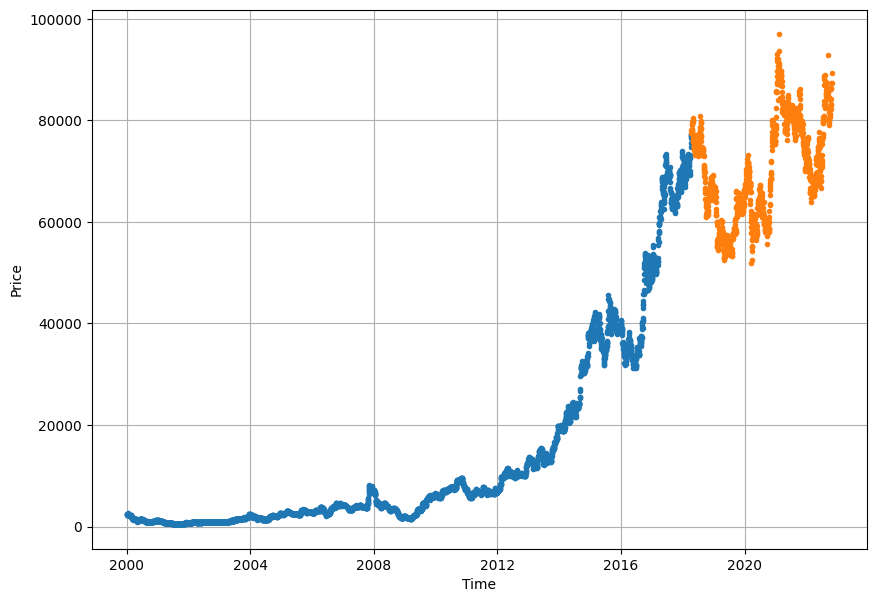

In [20]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train_data")
plot_time_series(timesteps=X_test,values=y_test,label="Test_data")

In [21]:
def mean_absolute_scaled_error(y_true,y_pred):
    mae=tf.reduce_mean(tf.abs(y_true-y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_pred[1:]))
    return mae/mae_naive_no_season

In [22]:
HORIZON = 1
WINDOW_SIZE = 7

In [23]:
def get_labelled_data(x, horizon=HORIZON):
    return x[:,:-horizon],x[:,-horizon:]

In [25]:
test_window,test_label = get_labelled_data(tf.expand_dims(tf.range(8),axis=0))
test_window,test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]], dtype=int32)>)

In [29]:
def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON):
    window_step=np.expand_dims(np.arange(window_size+horizon),axis=0)
    window_indexes=window_step+np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T
    windowed_array=x[window_indexes]
    windows,labels=get_labelled_data(windowed_array,horizon=horizon)
    return windows,labels

In [31]:
full_windows,full_labels = make_windows(prices,window_size = WINDOW_SIZE,horizon=HORIZON)

In [34]:
len(full_windows),len(full_labels)

(5680, 5680)

In [35]:
for i in range(3):
    print(f"Window: {full_windows[i]} --> Label: {full_labels[i]}")

Window: [2354.8  2426.1  2350.   2536.85 2470.8  2497.6  2315.  ] --> Label: [2500.2]
Window: [2426.1  2350.   2536.85 2470.8  2497.6  2315.   2500.2 ] --> Label: [2640.2]
Window: [2350.   2536.85 2470.8  2497.6  2315.   2500.2  2640.2 ] --> Label: [2514.75]


In [36]:
n=3
for i in range(n):
    print(f"Window: {full_windows[i-n]} --> Label: {full_labels[i-n]}")

Window: [81350.15 82267.95 83088.15 83149.45 84171.8  86224.8  86291.55] --> Label: [87342.85]
Window: [82267.95 83088.15 83149.45 84171.8  86224.8  86291.55 87342.85] --> Label: [87362.85]
Window: [83088.15 83149.45 84171.8  86224.8  86291.55 87342.85 87362.85] --> Label: [89368.3]


In [37]:
def make_train_test_splits(windows,labels,test_split=0.2):
    splits_size=int(len(windows))*(1-test_split)
    train_windows=windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows,test_windows,train_labels,test_labels

In [38]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels,test_split=0.2)

In [39]:
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(4549, 1131, 4549, 1131)

In [41]:
train_windows[:5],train_labels[:5]

(array([[2354.8 , 2426.1 , 2350.  , 2536.85, 2470.8 , 2497.6 , 2315.  ],
        [2426.1 , 2350.  , 2536.85, 2470.8 , 2497.6 , 2315.  , 2500.2 ],
        [2350.  , 2536.85, 2470.8 , 2497.6 , 2315.  , 2500.2 , 2640.2 ],
        [2536.85, 2470.8 , 2497.6 , 2315.  , 2500.2 , 2640.2 , 2514.75],
        [2470.8 , 2497.6 , 2315.  , 2500.2 , 2640.2 , 2514.75, 2538.2 ]]),
 array([[2500.2 ],
        [2640.2 ],
        [2514.75],
        [2538.2 ],
        [2439.25]]))

In [45]:
import os

def create_model_checkpoint(model_name,save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                              save_best_only=True,
                                              verbose=1)

In [47]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(HORIZON,activation = "linear")
],name = "model_1_dense")

In [48]:
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["mae","mse"])

In [51]:
model_1.fit(x=train_windows,
            y = train_labels,
            epochs = 100,
            verbose = 1,
            batch_size = 128,
            validation_data=(test_windows,test_labels),
            callbacks = [create_model_checkpoint(model_name= model_1.name)])

Epoch 1/100
26/36 [====================>.........] - ETA: 0s - loss: 1535.7524 - mae: 1535.7524 - mse: 13188863.0000 
Epoch 1: val_loss improved from inf to 1625.34399, saving model to model_experiments/model_1_dense
36/36 [==============================] - 2s 25ms/step - loss: 1244.5653 - mae: 1244.5653 - mse: 9872099.0000 - val_loss: 1625.3440 - val_mae: 1625.3440 - val_mse: 4771525.0000
Epoch 2/100
28/36 [======================>.......] - ETA: 0s - loss: 397.5905 - mae: 397.5905 - mse: 648758.0000
Epoch 2: val_loss improved from 1625.34399 to 1590.33508, saving model to model_experiments/model_1_dense
36/36 [==============================] - 1s 16ms/step - loss: 393.2559 - mae: 393.2559 - mse: 638049.0000 - val_loss: 1590.3351 - val_mae: 1590.3351 - val_mse: 4285524.5000
Epoch 3/100
28/36 [======================>.......] - ETA: 0s - loss: 385.1983 - mae: 385.1983 - mse: 613751.0000
Epoch 3: val_loss did not improve from 1590.33508
36/36 [==============================] - 0s 3ms/step